In [1]:
import pandas as pd
import translation_dicts as t_dicts
our_dict = dict([(k[0:-1],v[0:-1]) for k,v in t_dicts.namer_dict.items()])
import math
import json

In [2]:
big_file = pd.read_csv('BL_pink_04_2000Hz.csv')

In [8]:
def extract(big_f,node_num,starting_point,translation):
    actual_num = translation[str(node_num)]
    axes = ['x','y','z']
    res = {}
    for ax in axes:
        result = list(big_f[actual_num+ax][starting_point:512])
        assert not math.isnan(result[0])
        res[ax] = result
    return res
def write_all(big_f, translation):
    wireless = [21,22,17,18,29,55,56,58,60,61,63,64,41,43,44,46,49,53,68,31,32,15,37,39,40,69,96,95]
    for node in wireless:
        d = extract(big_f, node, 0,translation)
        with open('192.168.123.{}.json'.format(node), 'w') as outfile:
            json.dump(d, outfile)

In [9]:
write_all(big_file,our_dict)

In [5]:
with open('192.168.123.{}.json'.format(17)) as infile:
    d = json.load(infile)

In [6]:
len(d['z'])

1024

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


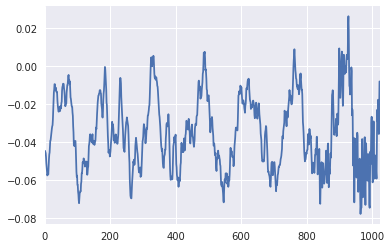

In [7]:
import seaborn as sns
import matplotlib
%matplotlib inline
sns.tsplot(d['x'])